In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (18,10)  # Ustawienie rozmarów wyświetlanych obrazów

(2048, 3072, 3)

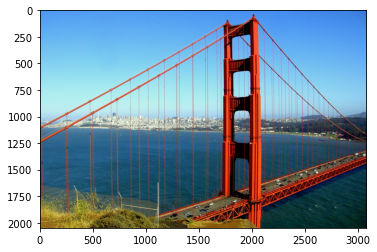

In [2]:
image = cv.imread("image.jpg")
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
image.shape

In [3]:
# Zadanie 1

kernel = [
    [-1, -1, -1],
    [-1, 8, -1],
    [-1,-1, -1],
]
kernel = np.asarray(kernel)
kernel = kernel
filtered_image = cv.filter2D(image, -1, kernel=kernel)

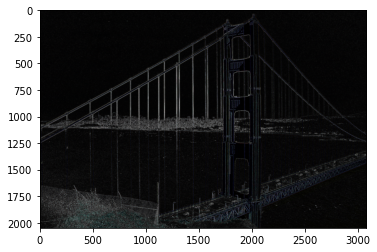

In [4]:
plt.imshow(filtered_image)

In [5]:
# Zadanie 2

matrix=np.array([[0.393, 0.769, 0.189], [0.349, 0.689, 0.168],[0.272,0.534,0.131]])
image_norm = cv.normalize(image, None, alpha=0, beta=1, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F)
image_norm

array([[[0.9725491 , 0.6       , 0.2901961 ],
        [0.9568628 , 0.5921569 , 0.28235295],
        [0.94117653, 0.5764706 , 0.26666668],
        ...,
        [0.80392164, 0.38823533, 0.1764706 ],
        [0.854902  , 0.43921572, 0.23137257],
        [0.8588236 , 0.4431373 , 0.23529413]],

       [[0.9176471 , 0.5529412 , 0.24313727],
        [0.95294124, 0.5882353 , 0.2784314 ],
        [0.9568628 , 0.59607846, 0.28627452],
        ...,
        [0.8352942 , 0.427451  , 0.21960786],
        [0.86666673, 0.45098042, 0.24313727],
        [0.854902  , 0.43529415, 0.23529413]],

       [[0.9333334 , 0.57254905, 0.27058825],
        [0.9490197 , 0.5882353 , 0.28627452],
        [0.95294124, 0.5921569 , 0.2901961 ],
        ...,
        [0.8745099 , 0.4666667 , 0.25882354],
        [0.8745099 , 0.46274513, 0.2627451 ],
        [0.8588236 , 0.44705886, 0.24705884]],

       ...,

       [[0.10196079, 0.41960788, 0.61960787],
        [0.07450981, 0.4039216 , 0.5921569 ],
        [0.07450981, 0

In [6]:
transformed_img = np.clip(a=np.dot(image_norm, matrix),a_min=0,a_max=1)
transformed_img

array([[[0.67054513, 1.        , 0.32262747],
        [0.65950984, 1.        , 0.31731766],
        [0.64360396, 1.        , 0.30966276],
        ...,
        [0.49943534, 0.97994518, 0.24028237],
        [0.55219612, 1.        , 0.26567453],
        [0.55617259, 1.        , 0.26758826]],

       [[0.61974514, 1.        , 0.29818041],
        [0.65553337, 1.        , 0.31540394],
        [0.66194513, 1.        , 0.31849021],
        ...,
        [0.53718436, 1.        , 0.258451  ],
        [0.56412553, 1.        , 0.27141571],
        [0.55189416, 1.        , 0.26552943]],

       [[0.64021965, 1.        , 0.30803531],
        [0.65612553, 1.        , 0.31569021],
        [0.660102  , 1.        , 0.31760394],
        ...,
        [0.57694906, 1.        , 0.27758826],
        [0.5766471 , 1.        , 0.27744316],
        [0.56074122, 1.        , 0.26978826]],

       ...,

       [[0.35504708, 0.69838828, 0.17093334],
        [0.33131767, 0.6518118 , 0.15951374],
        [0.33131767, 0

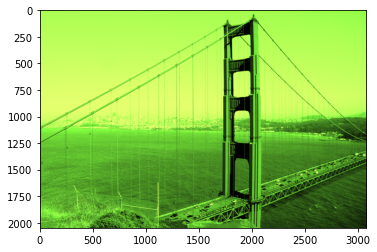

In [7]:
plt.imshow(transformed_img)

In [8]:
# zadanie 3
ycbcr_matrix=np.array([[.229,.587,.114], [-.168,-.331,-.5],[.5,-.418,.082]])
ycbcr_matrix

array([[ 0.229,  0.587,  0.114],
       [-0.168, -0.331, -0.5  ],
       [ 0.5  , -0.418,  0.082]])

In [9]:
ycbcr_img = np.clip(a=np.dot(image_norm, ycbcr_matrix),a_min=0,a_max=1)
ycbcr_img

array([[[0.26701178, 0.25098434, 0.        ],
        [0.2608157 , 0.247651  , 0.        ],
        [0.2520157 , 0.25019218, 0.        ],
        ...,
        [0.20710982, 0.2696314 , 0.        ],
        [0.23767061, 0.25973336, 0.        ],
        [0.23987061, 0.25909806, 0.        ]],

       [[0.2388157 , 0.25400394, 0.        ],
        [0.2586157 , 0.2482863 , 0.        ],
        [0.26211766, 0.24471375, 0.        ],
        ...,
        [0.22927453, 0.25703532, 0.        ],
        [0.24427061, 0.25782747, 0.        ],
        [0.24029021, 0.25939218, 0.        ]],

       [[0.25283923, 0.24524708, 0.        ],
        [0.26163923, 0.24270591, 0.        ],
        [0.26383923, 0.24207061, 0.        ],
        ...,
        [0.25127453, 0.25068238, 0.        ],
        [0.25389413, 0.2503412 , 0.        ],
        [0.24509414, 0.25288238, 0.        ]],

       ...,

       [[0.26265883, 0.        , 0.        ],
        [0.24528236, 0.        , 0.        ],
        [0.24528236, 0

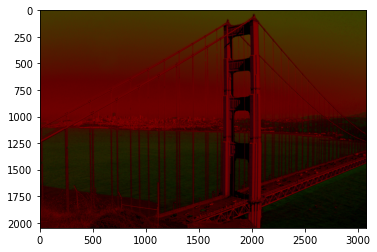

In [10]:
plt.imshow(ycbcr_img)

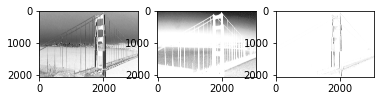

In [11]:
def show_channels_in_grey_scale(img):
    image_copy = img.copy()
    fig, ax = plt.subplots(1, 3)
    ax[0].imshow(image_copy[:, :, 0], cmap="Greys")  # or Reds
    ax[1].imshow(image_copy[:, :, 1], cmap="Greys")  # or Greens
    ax[2].imshow(image_copy[:, :, 2], cmap="Greys")  # or Blues

show_channels_in_grey_scale(ycbcr_img)

(1024, 1536, 3)

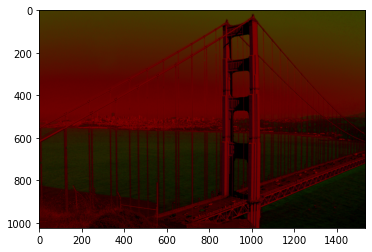

In [12]:
rows, cols, _channels = map(int, ycbcr_img.shape)
downsampled_image = cv.pyrDown(ycbcr_img, dstsize=(cols // 2, rows // 2))
plt.imshow(downsampled_image)
downsampled_image.shape

(2048, 3072, 3)

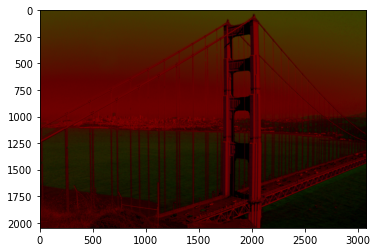

In [13]:
upsampled_image = cv.pyrUp(downsampled_image) # *2 by default
plt.imshow(upsampled_image)
upsampled_image.shape

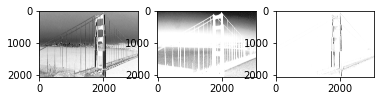

In [14]:
show_channels_in_grey_scale(upsampled_image)

In [15]:
# zadanie 4
np.square(np.subtract(ycbcr_img,upsampled_image)).mean() 

0.00018753026382459985